<a href="https://colab.research.google.com/github/RossBrinkerhoff/Springboard_Brinkerhoff/blob/main/Capstone_3/notebooks/02_rb_EDA_KMeans_Sillouette_scores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Silouette Score Calculation

This notebook is a colab notebook that will calcualte Silouette scores for various iterations of a Kmeans model

# Module imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sys
import os

from sklearn.preprocessing import RobustScaler

from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer


# Set path

In [2]:
print(os.getcwd())


/content


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

sys.path.insert(0,'/content/drive/My Drive/Colab Notebooks/Springboard/Springboard_Final_Capstone')

Mounted at /content/drive


In [4]:
%cd '/content/drive/MyDrive/Colab Notebooks/Springboard/Springboard_Final_Capstone'

/content/drive/MyDrive/Colab Notebooks/Springboard/Springboard_Final_Capstone


# Import Data

In [ ]:
leipzig_full_data_df = pd.read_csv('data/processed/leipzig_full_data.csv', index_col=0)
greifswald_full_data_df = pd.read_csv('data/processed/greifswald_full_data.csv', index_col=0)

In [ ]:
leipzig_full_data_df.head()

,Id,Age,Sex,Diagnosis,Center,Set,Time,SecToIcu,CRP,HGB,MCV,PCT,PLT,RBC,WBC,Label,HrsToIcu
438077,1,79,M,Control,Leipzig,Training,420.0,NaN,0.75,8.1,86.0,NaN,167.0,4.36,7.3,Control,NaN
438078,2,35,M,Control,Leipzig,Training,0.0,NaN,NaN,10.6,79.9,NaN,199.0,6.02,4.7,Control,NaN
438079,3,47,W,Control,Leipzig,Training,0.0,NaN,3.87,8.7,89.9,NaN,298.0,4.37,7.1,Control,NaN
438080,4,28,M,Control,Leipzig,Training,780.0,NaN,0.52,9.9,96.2,NaN,216.0,4.79,5.3,Control,NaN
438081,5,63,W,Control,Leipzig,Training,0.0,NaN,232.87,7.4,86.6,NaN,189.0,3.96,20.9,Control,NaN


In [ ]:
greifswald_full_data_df.head()

,Id,Age,Sex,Diagnosis,Center,Set,Time,SecToIcu,CRP,HGB,MCV,PCT,PLT,RBC,WBC,Label,HrsToIcu
0,1,25,W,Control,Greifswald,Validation,0.0,NaN,15.5,7.0,80.5,NaN,264.0,4.2,8.40,Control,NaN
1,2,75,M,Control,Greifswald,Validation,0.0,NaN,7.4,8.4,87.9,NaN,260.0,4.8,8.47,Control,NaN
2,4,69,M,Control,Greifswald,Validation,0.0,NaN,NaN,7.8,91.7,NaN,179.0,4.2,9.15,Control,NaN
3,5,88,W,Control,Greifswald,Validation,0.0,NaN,NaN,8.2,88.2,NaN,234.0,4.3,7.59,Control,NaN
4,6,75,M,Control,Greifswald,Validation,0.0,NaN,NaN,8.1,96.7,NaN,197.0,4.2,7.85,Control,NaN


#Prep and Scale Data

In [ ]:
cols_to_drop = ['Id','Sex','Diagnosis','Center','Set','Time','SecToIcu','CRP','PCT','HrsToIcu', 'Label']

leipzig_full_data_num = leipzig_full_data_df.drop(columns = cols_to_drop)
greifswald_full_data_num = greifswald_full_data_df.drop(columns = cols_to_drop)

In [ ]:
leipzig_full_data_num.head()

,Age,HGB,MCV,PLT,RBC,WBC
438077,79,8.1,86.0,167.0,4.36,7.3
438078,35,10.6,79.9,199.0,6.02,4.7
438079,47,8.7,89.9,298.0,4.37,7.1
438080,28,9.9,96.2,216.0,4.79,5.3
438081,63,7.4,86.6,189.0,3.96,20.9


In [ ]:
leipzip_scaler = RobustScaler()
greifswald_scaler = RobustScaler()

leipzig_full_data_num_scaled = leipzip_scaler.fit_transform(leipzig_full_data_num)
greifswald_full_data_num_scaled = greifswald_scaler.fit_transform(greifswald_full_data_num)

In [ ]:
leipzig_full_data_num_scaled

array([[ 0.71428571,  0.19047619, -0.27142857, -0.58974359,  0.15044248,
        -0.02380952],
       [-0.85714286,  1.38095238, -1.14285714, -0.31623932,  1.61946903,
        -0.64285714],
       [-0.42857143,  0.47619048,  0.28571429,  0.52991453,  0.15929204,
        -0.07142857],
       ...,
       [-0.10714286, -0.57142857,  0.75714286, -1.04273504, -0.99115044,
         0.21428571],
       [-0.10714286, -0.52380952,  0.45714286, -0.74358974, -0.92920354,
        -0.21428571],
       [-0.10714286,  0.        ,  0.55714286, -0.69230769, -0.46017699,
        -0.07142857]])

# Leipzig Silhouette scores

In [19]:
model_elbow_leipzig = KMeans(init='k-means++',random_state=42)
visualizer_elbow_leipzig = KElbowVisualizer(model_elbow_leipzig, k=(2,6), metric = 'silhouette')

# Fit the data to the visualizer and render the figure
visualizer_elbow_leipzig.fit(leipzig_full_data_num_scaled)
visualizer_elbow_leipzig.show();

NameError: name 'leipzig_full_data_num_scaled' is not defined

In [ ]:
# Access the scores for each k
k_values_leipzig = visualizer_elbow_leipzig.k_values_
elbow_scores_leipzig = visualizer_elbow_leipzig.k_scores_

# Print or use the scores
print("K values:", k_values_leipzig)
print("Scores:", elbow_scores_leipzig)

K values: [2, 3, 4, 5]
Scores: [0.9347059593116606, 0.206666407989494, 0.23015281739825763, 0.2267030591206035]


In [ ]:
'''k_values = [2]

silouette_avgs_leipzig = []

for k in k_values:
  model_silhouette = KMeans(n_clusters = k, random_state = 42)
  model_silhouette.fit(leipzig_full_data_num_scaled)
  labels = model_silhouette.labels_

  silhouette_avg = silhouette_score(leipzig_full_data_num_scaled, labels)
  silouette_avgs_leipzig.append(silhouette_avg)'''

#print(silouette_avgs_leipzig)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


# Greifswald Silhouette scores

In [ ]:
model_elbow_greifswald = KMeans(random_state=42)
visualizer_elbow_greifswald = KElbowVisualizer(model_elbow_greifswald, k=(2,6), metric = 'silhouette')

# Fit the data to the visualizer and render the figure
visualizer_elbow_greifswald.fit(greifswald_full_data_num_scaled)
visualizer_elbow_greifswald.show();

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Access the scores for each k
k_values_greifswald = visualizer_elbow_greifswald.k_values_
elbow_scores_greifswald = visualizer_elbow_greifswald.k_scores_

# Print or use the scores
print("K values:", k_values_greifswald)
print("Scores:", elbow_scores_greifswald)

In [ ]:
'''k_values = [2]

silouette_avgs_griefswald = []

for k in k_values:
  model_silhouette = KMeans(n_clusters = k, random_state = 42)
  model_silhouette.fit(greifswald_full_data_num_scaled)
  labels = model_silhouette.labels_

  silhouette_avg = silhouette_score(greifswald_full_data_num_scaled, labels)
  silouette_avgs_griefswald.append(silhouette_avg)'''

  #print(silouette_avgs_griefswald)
   #print(silouette_avgs_griefswald)




In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Jul 29 14:08:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA L4                      Off | 00000000:00:03.0 Off |                    0 |
| N/A   52C    P8              13W /  72W |      1MiB / 23034MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Sillouette Scores including Sex feature - Leipzig Only

## Import Leipzig Data

In [5]:
leipzig_full_data_df = pd.read_csv('data/processed/leipzig_full_data.csv', index_col=0)

In [6]:
leipzig_full_data_df.head()

,Id,Age,Sex,Diagnosis,Center,Set,Time,SecToIcu,CRP,HGB,MCV,PCT,PLT,RBC,WBC,Label,HrsToIcu
438077,1,79,M,Control,Leipzig,Training,420.0,NaN,0.75,8.1,86.0,NaN,167.0,4.36,7.3,Control,NaN
438078,2,35,M,Control,Leipzig,Training,0.0,NaN,NaN,10.6,79.9,NaN,199.0,6.02,4.7,Control,NaN
438079,3,47,W,Control,Leipzig,Training,0.0,NaN,3.87,8.7,89.9,NaN,298.0,4.37,7.1,Control,NaN
438080,4,28,M,Control,Leipzig,Training,780.0,NaN,0.52,9.9,96.2,NaN,216.0,4.79,5.3,Control,NaN
438081,5,63,W,Control,Leipzig,Training,0.0,NaN,232.87,7.4,86.6,NaN,189.0,3.96,20.9,Control,NaN


## Prep Data - Scale and Encode Sex Feature

In [7]:
cols_to_drop = ['Id','Diagnosis','Center','Set','Time','SecToIcu','CRP','PCT','HrsToIcu', 'Label']

leipzig_full_data_num = leipzig_full_data_df.drop(columns = cols_to_drop)

In [8]:
leipzig_full_data_num.head()

,Age,Sex,HGB,MCV,PLT,RBC,WBC
438077,79,M,8.1,86.0,167.0,4.36,7.3
438078,35,M,10.6,79.9,199.0,6.02,4.7
438079,47,W,8.7,89.9,298.0,4.37,7.1
438080,28,M,9.9,96.2,216.0,4.79,5.3
438081,63,W,7.4,86.6,189.0,3.96,20.9


## Dummy Encoder

In [9]:
leipzig_full_data_num_encoded = pd.get_dummies(leipzig_full_data_num, columns=['Sex'], prefix=['binary_feature_sex'], drop_first=True)

In [10]:
leipzig_full_data_num_encoded.head()

,Age,HGB,MCV,PLT,RBC,WBC,binary_feature_sex_W
438077,79,8.1,86.0,167.0,4.36,7.3,False
438078,35,10.6,79.9,199.0,6.02,4.7,False
438079,47,8.7,89.9,298.0,4.37,7.1,True
438080,28,9.9,96.2,216.0,4.79,5.3,False
438081,63,7.4,86.6,189.0,3.96,20.9,True


## Robust Scaler

In [11]:
leipzip_scaler = RobustScaler()

leipzig_full_data_num_encoded_scaled = leipzip_scaler.fit_transform(leipzig_full_data_num_encoded)

In [12]:
leipzig_full_data_num_encoded_scaled

array([[ 0.71428571,  0.19047619, -0.27142857, ...,  0.15044248,
        -0.02380952, -1.        ],
       [-0.85714286,  1.38095238, -1.14285714, ...,  1.61946903,
        -0.64285714, -1.        ],
       [-0.42857143,  0.47619048,  0.28571429, ...,  0.15929204,
        -0.07142857,  0.        ],
       ...,
       [-0.10714286, -0.57142857,  0.75714286, ..., -0.99115044,
         0.21428571, -1.        ],
       [-0.10714286, -0.52380952,  0.45714286, ..., -0.92920354,
        -0.21428571, -1.        ],
       [-0.10714286,  0.        ,  0.55714286, ..., -0.46017699,
        -0.07142857, -1.        ]])

# Leipzig Silhouette scores

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

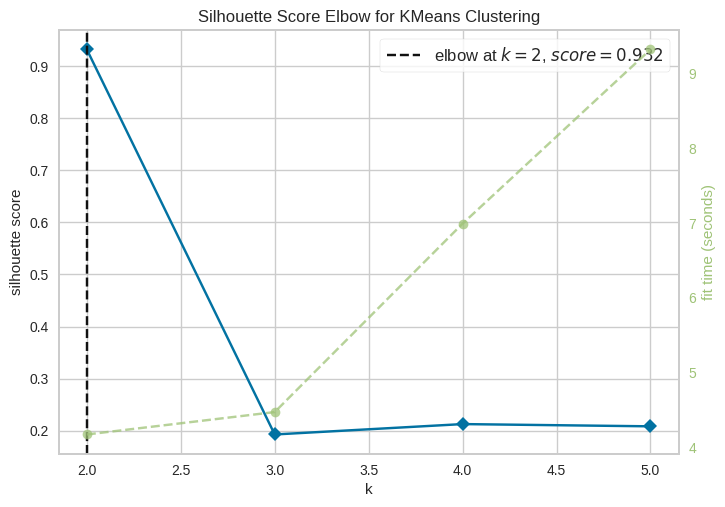

In [13]:
model_elbow_leipzig = KMeans(init='k-means++',random_state=42)
visualizer_elbow_leipzig = KElbowVisualizer(model_elbow_leipzig, k=(2,6), metric = 'silhouette')

# Fit the data to the visualizer and render the figure
visualizer_elbow_leipzig.fit(leipzig_full_data_num_encoded_scaled)
visualizer_elbow_leipzig.show();

In [14]:
# Access the scores for each k
k_values_leipzig = visualizer_elbow_leipzig.k_values_
elbow_scores_leipzig = visualizer_elbow_leipzig.k_scores_

# Print or use the scores
print("K values:", k_values_leipzig)
print("Scores:", elbow_scores_leipzig)

K values: [2, 3, 4, 5]
Scores: [0.9321617226875288, 0.19270528121177674, 0.21265608089081336, 0.20834510234974588]
